In [6]:
!pip install matplotlib --user

  Using cached matplotlib-3.3.2-cp38-cp38-win_amd64.whl (8.5 MB)


In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %matplotlib inline

In [35]:
data = pd. read_excel('(양식)동별 데이터_접근성지수 추가.xlsx')
print(data)

      행정동       사업체수_동별      종사자수__동별   유동인구1__점심시간대   유동인구2__3040  \
0     중앙동   8045.000000  66053.333333  149464.333333  12364.000000   
1     동광동   5088.235294  19417.647059   91032.941176   7451.764706   
2     대청동   1945.714286   9497.142857   64286.857143   5308.000000   
3     보수동   2123.809524   5945.238095   59243.333333   5764.761905   
4     부평동  10371.428571  25152.380952  167965.714286  14753.333333   
..    ...           ...           ...            ...           ...   
189  주례1동    936.601307   2558.823529   26154.509804   2766.797386   
190  주례2동    605.485232   3252.742616   28634.936709   2990.379747   
191  주례3동   1124.418605   4913.953488   60435.581395   6127.674419   
192   학장동    614.781022   3577.919708   18545.364964   1912.627737   
193   엄궁동    480.990099   1820.594059   14027.287129   1730.297030   

       유동인구3_주간변화         카페수         음식점수  버스정류장수  지하철  지하철+1   접근성지수  
0    33512.333333  293.333333   906.666667      25    1      2   337.5  
1    17950.58

In [33]:
df = pd.DataFrame(data)

In [34]:
df = df.drop(['행정동','유동인구3_주간변화','지하철', '지하철+1',], axis=1)
df.columns = ["사업체수", "종사자수", "점심시간 유동인구", "3040 유동인구", "카페수","음식점수"]
df.head()

,사업체수,종사자수,점심시간 유동인구,3040 유동인구,카페수,음식점수
0,8045.000000,66053.333333,149464.333333,12364.000000,293.333333,906.666667
1,5088.235294,19417.647059,91032.941176,7451.764706,300.000000,1582.352941
2,1945.714286,9497.142857,64286.857143,5308.000000,62.857143,300.000000
3,2123.809524,5945.238095,59243.333333,5764.761905,7.142857,78.571429
4,10371.428571,25152.380952,167965.714286,14753.333333,404.761905,1261.904762


In [22]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0).fit(df)

In [28]:
df['cluster'] = (kmeans.labels_)
df.head()

,사업체수,종사자수,점심시간 유동인구,3040 유동인구,카페수,음식점수,cluster
0,8045.000000,66053.333333,149464.333333,12364.000000,293.333333,906.666667,0
1,5088.235294,19417.647059,91032.941176,7451.764706,300.000000,1582.352941,1
2,1945.714286,9497.142857,64286.857143,5308.000000,62.857143,300.000000,1
3,2123.809524,5945.238095,59243.333333,5764.761905,7.142857,78.571429,1
4,10371.428571,25152.380952,167965.714286,14753.333333,404.761905,1261.904762,0


In [27]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
irisDF = df
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index
marker3_ind = irisDF[irisDF['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.plot(risDF.loc[marker0_ind,'pca_x'], marker='o') #동그라미
plt.plot(irisDF.loc[marker1_ind,'pca_x'], marker='s') #네모
plt.plot(irisDF.loc[marker2_ind,'pca_x'], marker='^') #세모
plt.plot(irisDF.loc[marker3_ind,'pca_x'], marker='*')


# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()

KeyError: 'cluster'

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(rankbyemployee_means)

rankbyemployee_means['pca_x'] = pca_transformed[:,0]
rankbyemployee_means['pca_y'] = pca_transformed[:,1]
rankbyemployee_means.head(3)

NameError: name 'rankbyemployee_means' is not defined

In [31]:
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

df = pd.DataFrame(df, columns=df.columns)

pca = PCA()
pca.fit(df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Number of Components", "y": "Explained Variance"}
)

In [30]:
pca.explained_variance_ratio_

array([9.86395245e-01, 1.28466413e-02, 5.45694970e-04, 1.42695309e-04,
       6.69234363e-05, 2.79988607e-06, 6.08800328e-11])

In [32]:
df = df.dropna()

In [16]:
df.head()

,사업체수,종사자수,점심시간 유동인구,3040 유동인구,카페수,스타벅스 수,음식점수
0,4827.0,39632.0,89678.6,7418.4,49.0,1.0,544.0
1,865.0,3301.0,15475.6,1266.8,18.0,0.0,269.0
2,681.0,3324.0,22500.4,1857.8,7.0,1.0,105.0
3,892.0,2497.0,24882.2,2421.2,1.0,0.0,33.0
4,2178.0,5282.0,35272.8,3098.2,21.0,0.0,265.0


In [13]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

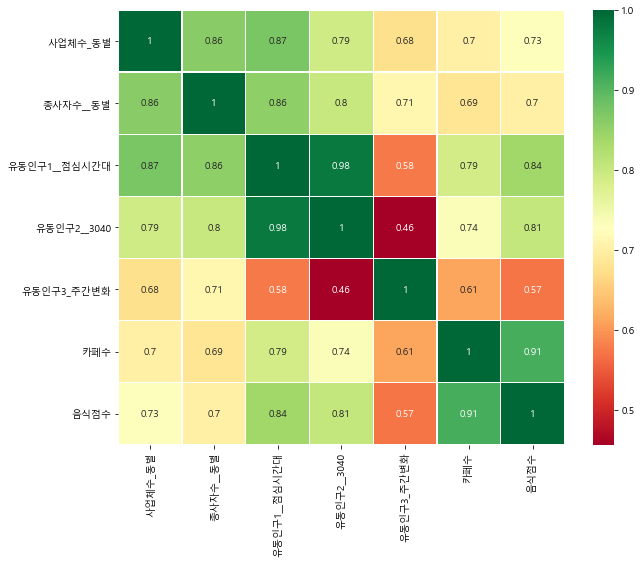

In [14]:

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
plt.show()

C:\Users\maxha\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\maxha\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



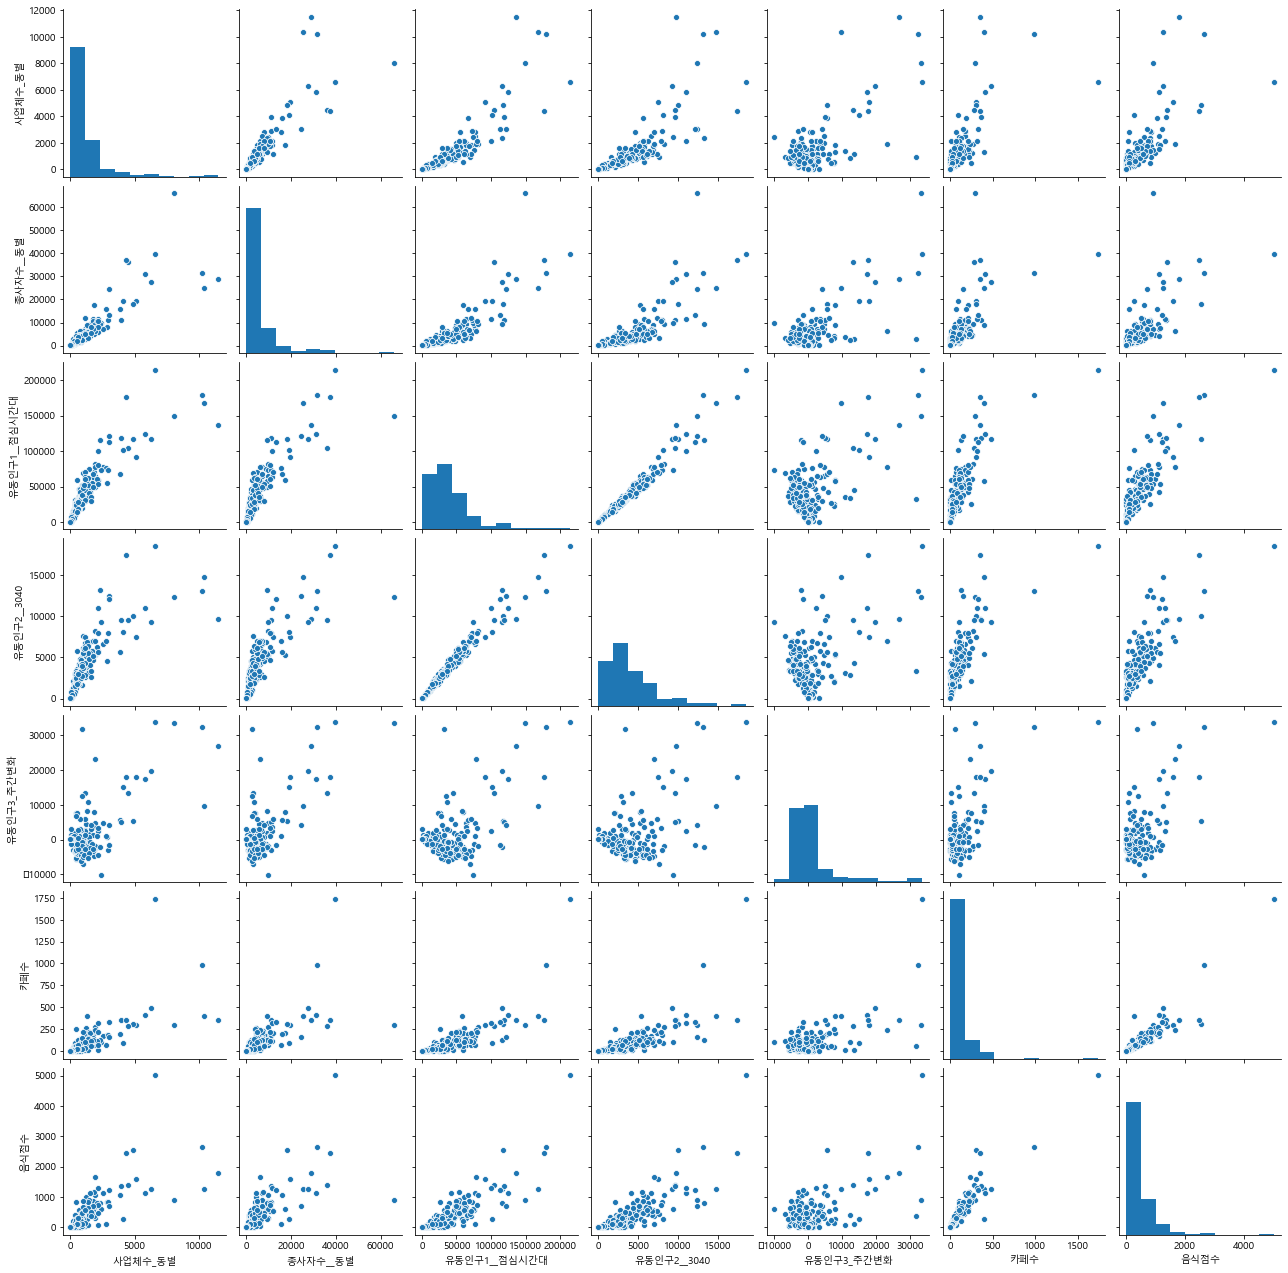

In [15]:
sns.pairplot(data, diag_kind='hist')
plt.show()

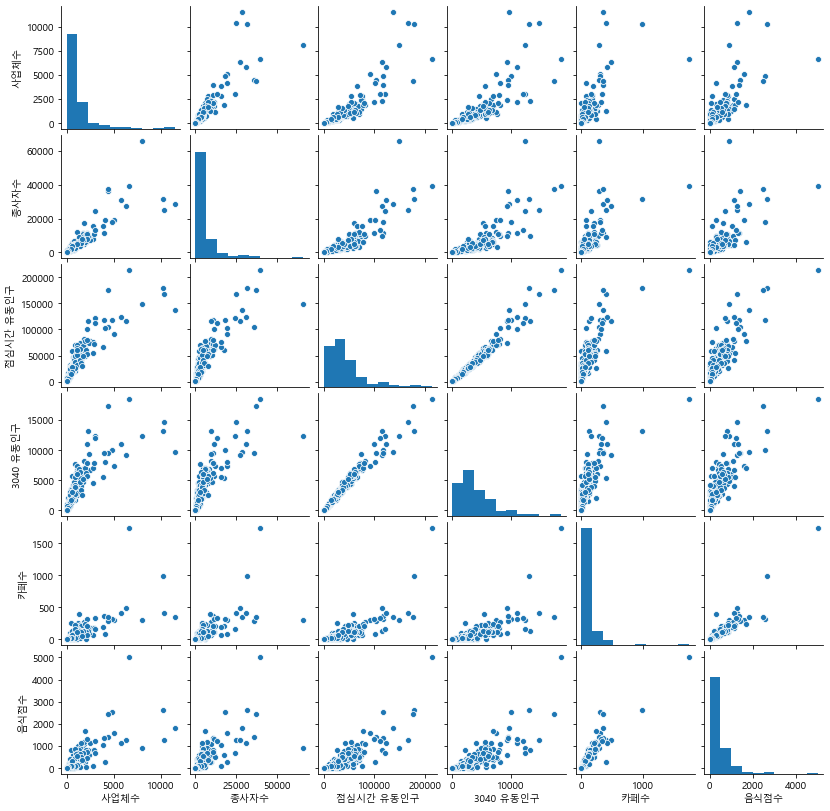

In [16]:
sns.pairplot(df, diag_kind='hist')
fig=plt.gcf() # fig에 접근
fig.set_size_inches(11,11) # fig그림 크기 조절
plt.show()

In [17]:
data2 = pd.read_excel('(양식)동별 데이터3.xlsx')
data2.head()

,구,행정동,사업체수(동별),종사자수 (동별),유동인구1 (점심시간대) (동별),유동인구2 (3040) (동별),카페_수__동별_,스타벅스수__동별_,음식점_수__동별_,카페 구별 월평균 매출액 (구) (단위:만원),카페 건단가 (단위:원),카페 월평균 주문건수
0,중구,중앙동,4827.0,39632.0,89678.6,7418.4,49.0,1.0,544.0,1260,7834,1608.373755
1,NaN,동광동,865.0,3301.0,15475.6,1266.8,18.0,0.0,269.0,1260,7834,1608.373755
2,NaN,대청동,681.0,3324.0,22500.4,1857.8,7.0,1.0,105.0,1260,7834,1608.373755
3,NaN,보수동,892.0,2497.0,24882.2,2421.2,1.0,0.0,33.0,1260,7834,1608.373755
4,NaN,부평동,2178.0,5282.0,35272.8,3098.2,21.0,0.0,265.0,1260,7834,1608.373755


In [18]:
df.iloc[:,[0,1]]

,사업체수,종사자수
0,8045.000000,66053.333333
1,5088.235294,19417.647059
2,1945.714286,9497.142857
3,2123.809524,5945.238095
4,10371.428571,25152.380952
...,...,...
193,480.990099,1820.594059
194,112.076433,532.382166
195,22.437402,242.879499
196,22.315436,106.291946


## ax= sns.heatmap(df.corr(),annot=False,cmap='YlGnBu',linewidths=0.2) 
fig=plt.gcf() # fig에 접근
fig.set_size_inches(10,8) # fig그림 크기 조절
ax.set_title('상관관계분석 히트맵', fontsize=20)
ax.tick_params(labelsize=15)
plt.show()

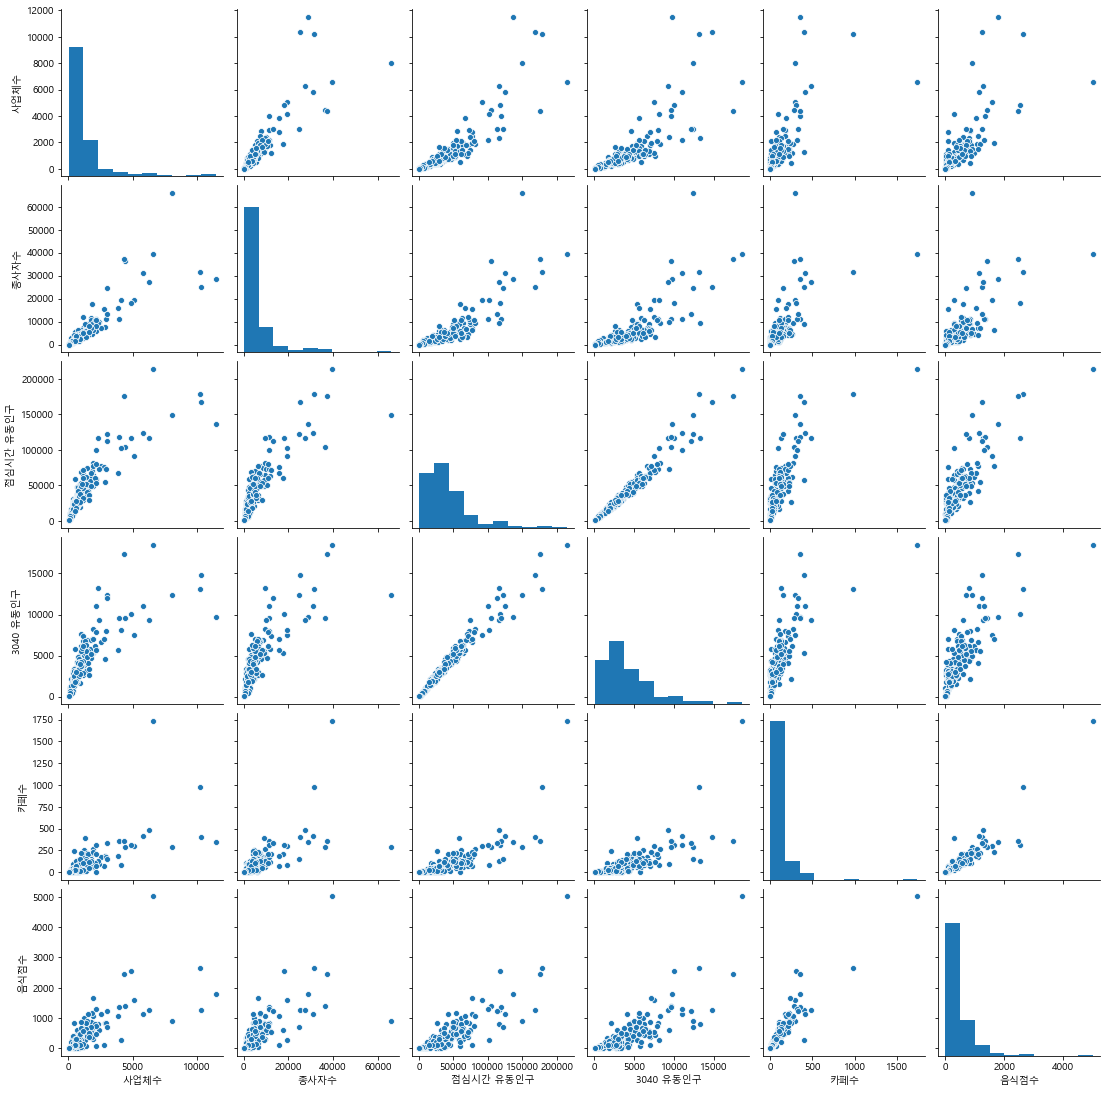

In [19]:
sns.pairplot(df, diag_kind='hist')
sns.color_palette('magma')
# fig=plt.gcf() # fig에 접근
# fig.set_size_inches(11,11) # fig그림 크기 조절
plt.show()

In [292]:
df

,사업체수,종사자수,점심시간 유동인구,3040 유동인구,카페수,음식점수
0,4827.0,39632.0,89678.6,7418.4,49.0,544.0
1,865.0,3301.0,15475.6,1266.8,18.0,269.0
2,681.0,3324.0,22500.4,1857.8,7.0,105.0
3,892.0,2497.0,24882.2,2421.2,1.0,33.0
4,2178.0,5282.0,35272.8,3098.2,21.0,265.0
...,...,...,...,...,...,...
200,4399.0,20896.0,185264.0,18901.8,79.0,2141.0
201,1147.0,12416.0,66595.8,5666.0,24.0,329.0
202,3362.0,20481.0,NaN,NaN,87.0,1353.0
203,798.0,3801.0,41714.6,3998.4,28.0,525.0


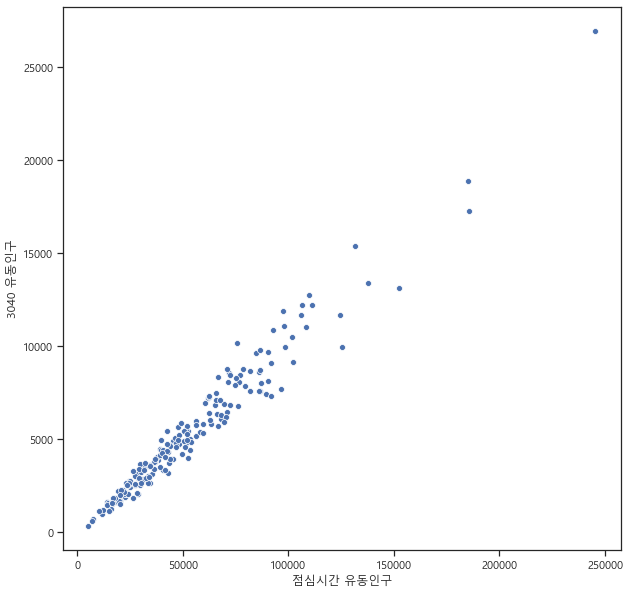

In [293]:
sns.scatterplot(x='점심시간 유동인구',y='3040 유동인구',data=df)
sns.color_palette('magma')

plt.rc('font', size=30)
plt.rcParams['figure.figsize']= [10, 10]
# fig=plt.gcf() # fig에 접근
# fig.set_size_inches(11,11) # fig그림 크기 조절
#diag_kind='hist')
plt.show()

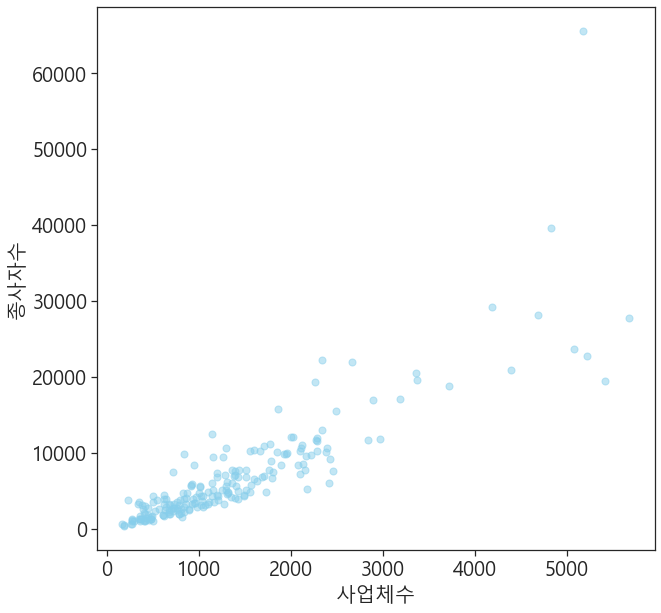

In [297]:
ax=df.plot(kind='scatter', x='사업체수', y='종사자수', s=50, color='skyblue', alpha=0.5, fontsize=20) # marker color by grou
plt.rcParams['figure.figsize']= [10,10]
ax.set_xlabel('사업체수', fontsize=20)
ax.set_ylabel('종사자수', fontsize=20)  
plt.show()

In [298]:
rankbyemployee = pd.read_csv('부산시 3040 직장인 거주 1차 선정 지역(결측치 제거).csv', encoding='cp949')

In [299]:
rankbyemployee.index = rankbyemployee['행정동']
rankbyemployee=rankbyemployee.drop('행정동', axis=1)
rankbyemployee.head()

,종사자수,음식점_수__동별_,3040_유동인구
행정동,,,
녹산동,65477,863.0,26928.0
중앙동,39632,544.0,7418.0
우2동,29176,905.0,17269.0
부전2동,28099,3562.0,13141.0
감전동,27681,1258.0,9111.0


In [358]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# rankbyemployee = pd.to_numeric(rankbyemployee['종사자수'])
# rankbyemployee = pd.to_numeric(rankbyemployee['음식점_수_동별_'])
# rankbyemployee = pd.to_numeric(rankbyemployee['3040_유동인구'])
# list =list([rankbyemployee['종사자수'], rankbyemployee['음식점_수__동별_'],rankbyemployee['3040_유동인구'] )
list= rankbyemployee.values.tolist()
# StandardScaler객체 생성
scaler = MinMaxScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(list)
rankbyemployee_scale = scaler.transform(list)
rankbyemployee_scale=pd.DataFrame(data=rankbyemployee_scale,columns=rankbyemployee.columns, index=rankbyemployee.index)

rankbyemployee_scale.head()

,종사자수,음식점_수__동별_,3040_유동인구
행정동,,,
녹산동,1.000000,0.239290,1.000000
중앙동,0.602751,0.149380,0.266486
우2동,0.442038,0.251127,0.636852
부전2동,0.425484,1.000000,0.481653
감전동,0.419059,0.350620,0.330138


In [376]:
rankbyemployee_scale['점수합'] = rankbyemployee_scale['종사자수'] + rankbyemployee_scale['음식점_수__동별_'] + rankbyemployee_scale['3040_유동인구'] 
rankbyemployee_scale.head()

,종사자수,음식점_수__동별_,3040_유동인구,점수합
행정동,,,,
녹산동,1.000000,0.239290,1.000000,2.239290
부전2동,0.425484,1.000000,0.481653,1.907137
기장읍,0.314771,0.599493,0.698248,1.612512
대연3동,0.254780,0.587373,0.490714,1.332867
우2동,0.442038,0.251127,0.636852,1.330018


In [377]:
rankbyemployee_scale= rankbyemployee_scale.sort_values(["점수합"], ascending=False)
# rankbyemployee_scale= rankbyemployee_scale.reset_index(drop=False)
rankbyemployee_scale.head()

,종사자수,음식점_수__동별_,3040_유동인구,점수합
행정동,,,,
녹산동,1.000000,0.239290,1.000000,2.239290
부전2동,0.425484,1.000000,0.481653,1.907137
기장읍,0.314771,0.599493,0.698248,1.612512
대연3동,0.254780,0.587373,0.490714,1.332867
우2동,0.442038,0.251127,0.636852,1.330018


In [373]:
rankbyemployee_scale.to_csv('부산시 3040 직장인 거주 1차 선정(정규화).csv', encoding='cp949')

In [379]:
rankbyemployee_scale = rankbyemployee_scale.drop('점수합', axis=1)
rankbyemployee_scale

,종사자수,음식점_수__동별_,3040_유동인구
행정동,,,
녹산동,1.000000,0.239290,1.000000
부전2동,0.425484,1.000000,0.481653
기장읍,0.314771,0.599493,0.698248
대연3동,0.254780,0.587373,0.490714
우2동,0.442038,0.251127,0.636852
...,...,...,...
초장동,0.001599,0.039459,0.013234
초량6동,0.008869,0.002537,0.034138
수정5동,0.003243,0.001127,0.032145


In [378]:
import numpy as np
rankbyemployee_scale1 = rankbyemployee_scale.dropna()
rankbyemployee_scale2 = rankbyemployee_scale.drop(['점수합'], axis=1)
kmeans = KMeans(n_clusters=4,init='k-means++', max_iter=100, random_state=0).fit(rankbyemployee_scale2)
rankbyemployee_scale2['cluster'] = kmeans.labels_
kmeans.labels_

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [365]:
rankbyemployee_scale2

,종사자수,음식점_수__동별_,3040_유동인구,cluster,pca_x,pca_y
행정동,,,,,,
녹산동,1.000000,0.239290,1.000000,3,-1.336562,1.459261
부전2동,0.425484,1.000000,0.481653,0,1.581554,0.410154
기장읍,0.314771,0.599493,0.698248,0,1.549259,0.360388
대연3동,0.254780,0.587373,0.490714,0,1.514757,0.178333
우2동,0.442038,0.251127,0.636852,0,1.506071,0.293261
...,...,...,...,...,...,...
초장동,0.001599,0.039459,0.013234,2,-0.599554,-0.098880
초량6동,0.008869,0.002537,0.034138,2,-0.600956,-0.091566
수정5동,0.003243,0.001127,0.032145,2,-0.601875,-0.096971


In [363]:
rankbyemployee_scale3 = rankbyemployee_scale2.drop('cluster', axis=1)

In [380]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(rankbyemployee_scale)

rankbyemployee_scale2['pca_x'] = pca_transformed[:,0]
rankbyemployee_scale2['pca_y'] = pca_transformed[:,1]
rankbyemployee_scale2.head(3)

,종사자수,음식점_수__동별_,3040_유동인구,cluster,pca_x,pca_y
행정동,,,,,,
녹산동,1.000000,0.239290,1.000000,3,1.055153,0.607839
부전2동,0.425484,1.000000,0.481653,0,0.838667,-0.447485
기장읍,0.314771,0.599493,0.698248,0,0.709922,-0.124971


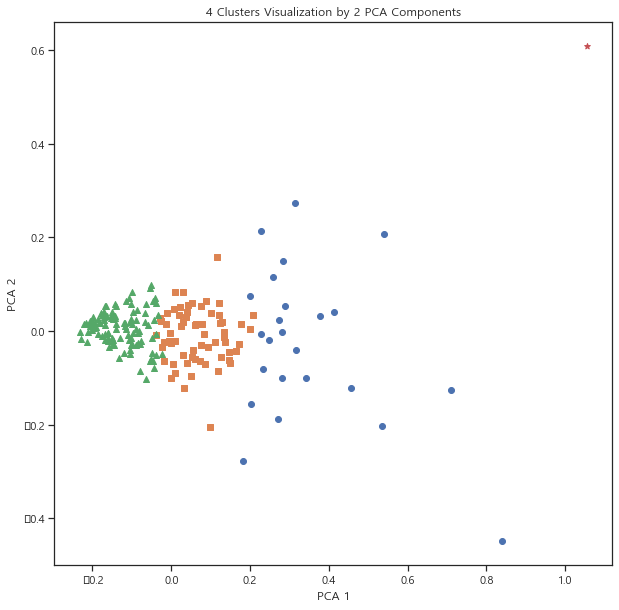

In [382]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
irisDF = rankbyemployee_scale2
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index
marker3_ind = irisDF[irisDF['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') #동그라미
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s') #네모
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^') #세모
plt.scatter(x=irisDF.loc[marker3_ind,'pca_x'], y=irisDF.loc[marker3_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('4 Clusters Visualization by 2 PCA Components')
plt.show()

In [353]:
import numpy as np
rankbyemployee_means = rankbyemployee_means.dropna()
# rankbyemployee_means = rankbyemployee_means.drop(['점수합'], axis=1)
kmeans = KMeans(n_clusters=4,init='k-means++', max_iter=100, random_state=0).fit(rankbyemployee_scale2)
rankbyemployee_means['cluster'] = kmeans.labels_
kmeans.labels_

array([3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [354]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(rankbyemployee_means)

rankbyemployee_means['pca_x'] = pca_transformed[:,0]
rankbyemployee_means['pca_y'] = pca_transformed[:,1]
rankbyemployee_means.head(3)

,종사자수,음식점_수__동별_,3040_유동인구,cluster,pca_x,pca_y
행정동,,,,,,
녹산동,65477,863.0,26928.0,3,62492.648292,2591.285915
중앙동,39632,544.0,7418.0,2,31147.390221,10626.359276
우2동,29176,905.0,17269.0,2,25284.324831,-2487.893883


C:\Users\maxha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\maxha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


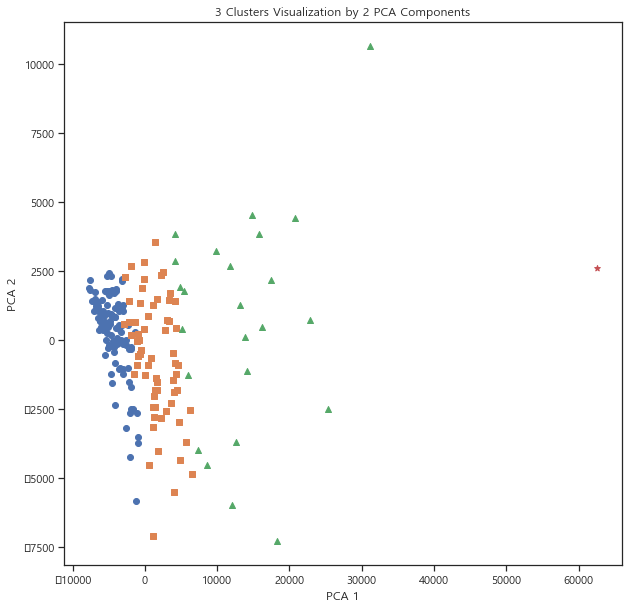

In [355]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
irisDF = rankbyemployee_means
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index
marker3_ind = irisDF[irisDF['cluster']==3].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='o') #동그라미
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s') #네모
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^') #세모
plt.scatter(x=irisDF.loc[marker3_ind,'pca_x'], y=irisDF.loc[marker3_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()